In [248]:
#imports
#numpy,pandas,scipy, math, matplotlib
import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt

#estimators
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

#model metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

#cross validation
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

#helpers
%matplotlib inline

In [249]:
# Data
rawData = pd.read_csv('credit_Oneupdate_dataframe.csv', header=0)
rawData.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,Limit_Balance
0,1,20000,female,university,1,24,2,2,-1,-1,...,0,0,0,689,0,0,0,0,default,0
1,2,120000,female,university,2,26,-1,2,0,0,...,3455,3261,0,1000,1000,1000,0,2000,default,1
2,3,90000,female,university,2,34,0,0,0,0,...,14948,15549,1518,1500,1000,1000,1000,5000,not default,0
3,4,50000,female,university,1,37,0,0,0,0,...,28959,29547,2000,2019,1200,1100,1069,1000,not default,0
4,5,50000,male,university,1,57,-1,0,-1,0,...,19146,19131,2000,36681,10000,9000,689,679,not default,0


In [258]:
# Examine the structure of the data
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 30 columns):
 #   Column                                  Non-Null Count  Dtype
---  ------                                  --------------  -----
 0   ID                                      30000 non-null  int64
 1   LIMIT_BAL                               30000 non-null  int64
 2   MARRIAGE                                30000 non-null  int64
 3   AGE                                     30000 non-null  int64
 4   PAY_0                                   30000 non-null  int64
 5   PAY_2                                   30000 non-null  int64
 6   PAY_3                                   30000 non-null  int64
 7   PAY_4                                   30000 non-null  int64
 8   PAY_5                                   30000 non-null  int64
 9   PAY_6                                   30000 non-null  int64
 10  BILL_AMT1                               30000 non-null  int64
 11  BILL_AMT2      

In [256]:
rawData = rawData.drop(["Limit_Balance"], axis=1)

In [257]:
# Convert object data type to Dummy variable
rawData = pd.get_dummies(rawData)
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 30 columns):
 #   Column                                  Non-Null Count  Dtype
---  ------                                  --------------  -----
 0   ID                                      30000 non-null  int64
 1   LIMIT_BAL                               30000 non-null  int64
 2   MARRIAGE                                30000 non-null  int64
 3   AGE                                     30000 non-null  int64
 4   PAY_0                                   30000 non-null  int64
 5   PAY_2                                   30000 non-null  int64
 6   PAY_3                                   30000 non-null  int64
 7   PAY_4                                   30000 non-null  int64
 8   PAY_5                                   30000 non-null  int64
 9   PAY_6                                   30000 non-null  int64
 10  BILL_AMT1                               30000 non-null  int64
 11  BILL_AMT2      

In [274]:
#Features
X = rawData.loc[:, ['MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'SEX_male', 'SEX_female', 'EDUCATION_high school', 'EDUCATION_other', 'EDUCATION_university', 'EDUCATION_graduate school', 'default payment next month_default']]
print('Summary of feature sample')
X.head()

Summary of feature sample


,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX_male,SEX_female,EDUCATION_high school,EDUCATION_other,EDUCATION_university,EDUCATION_graduate school,default payment next month_default
0,1,24,2,2,-1,-1,-2,-2,3913,3102,...,0,0,0,0,1,0,0,1,0,1
1,2,26,-1,2,0,0,0,2,2682,1725,...,1000,0,2000,0,1,0,0,1,0,1
2,2,34,0,0,0,0,0,0,29239,14027,...,1000,1000,5000,0,1,0,0,1,0,0
3,1,37,0,0,0,0,0,0,46990,48233,...,1100,1069,1000,0,1,0,0,1,0,0
4,1,57,-1,0,-1,0,0,0,8617,5670,...,9000,689,679,1,0,0,0,1,0,0


In [275]:
# Explore the X variable
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 26 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   MARRIAGE                            30000 non-null  int64
 1   AGE                                 30000 non-null  int64
 2   PAY_0                               30000 non-null  int64
 3   PAY_2                               30000 non-null  int64
 4   PAY_3                               30000 non-null  int64
 5   PAY_4                               30000 non-null  int64
 6   PAY_5                               30000 non-null  int64
 7   PAY_6                               30000 non-null  int64
 8   BILL_AMT1                           30000 non-null  int64
 9   BILL_AMT2                           30000 non-null  int64
 10  BILL_AMT3                           30000 non-null  int64
 11  BILL_AMT4                           30000 non-null  int64
 12  BILL

In [276]:
# Dependent variable
y = rawData['LIMIT_BAL']

In [353]:
# Tuning parameters and model definition
model = LinearRegression(n_jobs=10, fit_intercept=True)

In [278]:
# Dependent variable check
print(y)

0         20000
1        120000
2         90000
3         50000
4         50000
          ...  
29995    220000
29996    150000
29997     30000
29998     80000
29999     50000
Name: LIMIT_BAL, Length: 30000, dtype: int64


In [279]:
# Get scores of model
print(cross_val_score(model, X, y, cv=3))

[0.35678845 0.38069775 0.33737827]


In [280]:
# Modeling Format:
algosClass = []
algosClass.append(('Random Forest Regressor',RandomForestRegressor()))
algosClass.append(('Linear Regression',LinearRegression()))
algosClass.append(('Support Vector Regression',SVR()))

#### Regression
results = []
names = []
for name, model in algosClass:
    result = cross_val_score(model, X,y, cv=3, scoring='r2')
    names.append(name)
    results.append(result)
    
for i in range(len(names)):
    print(names[i],results[i].mean())

In [282]:
#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 30, random_state = 123)

In [283]:
# Modeling (Classification)
algo = RandomForestRegressor()
model = algo.fit(X_train,y_train)

In [284]:
# Predictions
predictions = model.predict(X_test)
print(y_test,preds)

25665     40000
16464     80000
22386    170000
10149    200000
8729      50000
25295     60000
8876      50000
12348    140000
3858     200000
19209    210000
120       50000
12962     20000
9346      10000
12609     50000
29679    200000
14091     50000
7661      50000
3382     170000
3588     210000
29494    320000
4582      30000
6154      30000
15161     50000
15041    350000
28665    140000
22975    160000
7396     200000
7008      20000
11478    500000
1112      90000
Name: LIMIT_BAL, dtype: int64 [ 0.8146847   1.15917493  1.11160689  1.58827516  0.78092121  0.62967627
  0.81216524  1.47965462  1.01161308  1.69209778 -0.34755264  0.6586433
  0.34073317  0.98196518  1.92361205  0.79562941  0.71721397  0.80947463
  2.04269566  1.73913956 -0.06616173  0.28838181  0.55796365  1.98631467
  1.15969451  1.04187361  0.7629538   0.43039959  1.85204566  1.08092711]


In [285]:
# Make Predictions
predictions = model.predict(X_test)
predRsquared = r2_score(y_test,predictions)
rmse = sqrt(mean_squared_error(y_test, predictions))
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: 0.614
RMSE: 69788.990


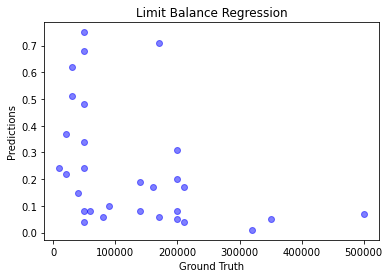

In [365]:
# Plot Results
plt.scatter(y_test, predictions, color=['blue'], alpha=0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.title("Limit Balance Regression")
plt.show();

In [338]:
#Features
Xb = rawData.loc[:, ['MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'SEX_male', 'SEX_female', 'EDUCATION_high school', 'EDUCATION_other', 'EDUCATION_university', 'EDUCATION_graduate school', 'LIMIT_BAL']]
print('Summary of feature sample')
Xb.head()

Summary of feature sample


,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX_male,SEX_female,EDUCATION_high school,EDUCATION_other,EDUCATION_university,EDUCATION_graduate school,LIMIT_BAL
0,1,24,2,2,-1,-1,-2,-2,3913,3102,...,0,0,0,0,1,0,0,1,0,20000
1,2,26,-1,2,0,0,0,2,2682,1725,...,1000,0,2000,0,1,0,0,1,0,120000
2,2,34,0,0,0,0,0,0,29239,14027,...,1000,1000,5000,0,1,0,0,1,0,90000
3,1,37,0,0,0,0,0,0,46990,48233,...,1100,1069,1000,0,1,0,0,1,0,50000
4,1,57,-1,0,-1,0,0,0,8617,5670,...,9000,689,679,1,0,0,0,1,0,50000


In [339]:
# Explore the X variable
Xb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   MARRIAGE                   30000 non-null  int64
 1   AGE                        30000 non-null  int64
 2   PAY_0                      30000 non-null  int64
 3   PAY_2                      30000 non-null  int64
 4   PAY_3                      30000 non-null  int64
 5   PAY_4                      30000 non-null  int64
 6   PAY_5                      30000 non-null  int64
 7   PAY_6                      30000 non-null  int64
 8   BILL_AMT1                  30000 non-null  int64
 9   BILL_AMT2                  30000 non-null  int64
 10  BILL_AMT3                  30000 non-null  int64
 11  BILL_AMT4                  30000 non-null  int64
 12  BILL_AMT5                  30000 non-null  int64
 13  BILL_AMT6                  30000 non-null  int64
 14  PAY_AMT1              

In [348]:
# Dependent variable
yb = rawData['default payment next month_default']

In [349]:
# Tuning parameters and model definition
modelb = LinearRegression(n_jobs=10, fit_intercept=True)

In [350]:
# Dependent variable check
print(yb)

0        1
1        1
2        0
3        0
4        0
        ..
29995    0
29996    0
29997    1
29998    1
29999    1
Name: default payment next month_default, Length: 30000, dtype: uint8


In [354]:
# Get scores of model
print(cross_val_score(modelb, Xb, yb, cv=3))

[0.10524747 0.13311847 0.12469405]


In [352]:
# Modeling Format:
algosClassb = []
algosClassb.append(('Random Forest Regressor',RandomForestRegressor()))
algosClassb.append(('Linear Regression',LinearRegression()))
algosClassb.append(('Support Vector Regression',SVR()))

In [355]:
# Regression
resultsb = []
namesb = []
for name, model in algosClass:
    resultb = cross_val_score(model, Xb,yb, cv=3, scoring='r2')
    namesb.append(name)
    resultsb.append(result)
    
for i in range(len(names)):
    print(names[i],results[i].mean())

Random Forest Regressor 0.4659078513237211
Linear Regression 0.35828815408033027
Support Vector Regression -0.050242460002017854


In [356]:
#Train/Test Split
Xb_train, Xb_test, yb_train, yb_test = train_test_split(Xb, yb, test_size = 30, random_state = 123)

In [361]:
# Modeling (Classification)
algob = RandomForestRegressor()
modelb = algob.fit(Xb_train,yb_train)

In [359]:
# Predictions
predictionsb = modelb.predict(Xb_test)
print(yb_test,preds)

25665    0
16464    0
22386    1
10149    1
8729     0
25295    0
8876     0
12348    0
3858     0
19209    0
120      1
12962    1
9346     1
12609    1
29679    0
14091    0
7661     1
3382     0
3588     0
29494    0
4582     0
6154     1
15161    0
15041    0
28665    1
22975    0
7396     1
7008     0
11478    0
1112     0
Name: default payment next month_default, dtype: uint8 [ 0.8146847   1.15917493  1.11160689  1.58827516  0.78092121  0.62967627
  0.81216524  1.47965462  1.01161308  1.69209778 -0.34755264  0.6586433
  0.34073317  0.98196518  1.92361205  0.79562941  0.71721397  0.80947463
  2.04269566  1.73913956 -0.06616173  0.28838181  0.55796365  1.98631467
  1.15969451  1.04187361  0.7629538   0.43039959  1.85204566  1.08092711]


In [363]:
# Make Predictions
predictions = modelb.predict(Xb_test)
predRsquared = r2_score(yb_test,predictions)
rmse = sqrt(mean_squared_error(yb_test, predictions))
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: 0.234
RMSE: 0.413


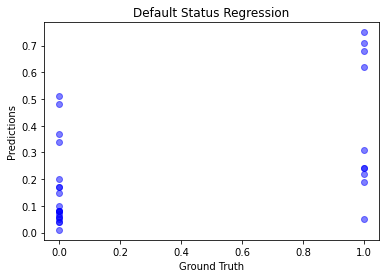

In [366]:
# Plot Results
plt.scatter(yb_test, predictions, color=['blue'], alpha=0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.title("Default Status Regression")
plt.show();